![](https://images.aicrowd.com/raw_images/challenges/banner_file/838/1e01f5dae1e5fb5537a1.jpg)

<h2><center>Starter Code for Emotion Detection</center></h2>

<!-- <h6><center>Author : Shubhamai</center></h6> -->



<!-- --- -->



### What we are going to Learn

  - Basics of Natual Language Preprocessing 
  - Using a very popular & powerful python library called [spaCy](https://spacy.io/) for language processing to see how we can preprocess texts using spaCy and convert them into numbers.
  - Use Decision Tree Classifier from sklearn to train, validate & test the model for text classification.
  - Testing and Submitting the Results to the Challenge. 

# Natural Language Preprocessing 🗣️ 

Now Natural Language Preprocessing ( or NLP in short ) allows Machines to understand human languages and do certain kinds of tasks such as classification. For ex. 

  - Gmail   -   Classifying emails as Spam/Not Spam. 
  
  - GPT-3 ( A powerful language model by [OpenAI](https://openai.com/) ) -   Generating blogs so good that even humans couldn't classify accurately if the blog was generated by a machine or human 🤯   

and tons of others...


Now in this challenge, we are going to learn a very basic task in Natural Language Processing, which is Text Classification, so let's begin!


### Downloading Dataset

AIcrowd had a recent addition that allows you to directly download the dataset from any challenge using AIcrowd CLI. 

So we will first need to download the python library by AIcrowd that will allow us to download the dataset by just inputting the API key. 

In [ ]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

In [ ]:
!aicrowd login 


Please login here: https://api.aicrowd.com/auth/IRy0FTSGom4RdKSn-hhZhfJDP7wzEX309KhKTQgyBuo
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://api.aicrowd.com/auth/IRy0FTSGom4RdKSn-hhZhfJDP7wzEX309KhKTQgyBuo'
API Key valid
Gitlab access token valid
Saved details successfully!


In [ ]:
# Downloading the Dataset
!mkdir data
!aicrowd dataset download --challenge emotion-detection -j 3 -o data

mkdir: cannot create directory ‘data’: File exists
val.csv: 100% 262k/262k [00:00<00:00, 3.03MB/s]
test.csv:   0% 0.00/642k [00:00<?, ?B/s]
test.csv: 100% 642k/642k [00:00<00:00, 5.48MB/s]

train.csv: 100% 2.30M/2.30M [00:00<00:00, 14.6MB/s]


### Downloading & Importing Libraries

Here we are going to use spaCy to do our text classification task. [SpaCy](https://spacy.io/) is a very popular python library for Natural Language Processing and has amazing documentation.😇

We are also downloading a python file `explacy.py` from [tylerneylon/explacy](https://github.com/tylerneylon/explacy), which will help us visualize some NLP topics.

In [ ]:
!pip install --upgrade spacy rich
!python -m spacy download en_core_web_sm # Downloaing the model for engligh language will contains many pretrained preprocessing pipelines 

  Using cached rich-12.3.0-py3-none-any.whl (232 kB)
  Using cached rich-12.2.0-py3-none-any.whl (229 kB)
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py

--2022-05-05 18:53:27--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6896 (6.7K) [text/plain]
Saving to: ‘explacy.py.1’

explacy.py.1        100%[===================>]   6.73K  --.-KB/s    in 0s      

2022-05-05 18:53:27 (79.5 MB/s) - ‘explacy.py.1’ saved [6896/6896]



In [ ]:
import pandas as pd
import spacy
import explacy
import random
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score
import os

# To make things more beautiful! 
from rich.console import Console
from rich.table import Table
from rich import pretty
pretty.install()


# Seeding everything for getting same results 
random.seed(1)
spacy.util.fix_random_seed(1)


# function to display YouTube videos
from IPython.display import YouTubeVideo

In [ ]:
# spaCy v3.0 the the latest version spaCy 
spacy.__version__

'3.3.0'

### Reading Dataset

Reading the necessary files to train, validation & submit our results! 

In [ ]:
train_dataset = pd.read_csv("data/train.csv")
validation_dataset = pd.read_csv("data/val.csv")[1:]
test_dataset = pd.read_csv("data/test.csv")
train_dataset

,text,label
0,takes no time to copy/paste a press release,0
1,You're delusional,1
2,Jazz fan here. I completely feel. Lindsay Mann...,0
3,ah i was also confused but i think they mean f...,0
4,Thank you so much. ♥️ that means a lot.,0
...,...,...
31250,thank you so much! :),0
31251,That works too. To each their own.,0
31252,"Friendly fire dude, I wanted the other criminal",0
31253,"Yes, exactly. Fix a date and if he still procr...",0


# Text Classification  🧠

In this section, we are going to train a text classifier and do some validation tests. 

## Word2Vec

Now, Computers don't understand texts; they only understand numbers. There are many ways to convert a text into a number, but here we will use `word2vec` from spaCy.
‍   ‍  ‍ ‍
Now how does `word2vec` actually convert text into numbers ? `word2vec` uses techniques like Skip-grams or CBOW. It relations between words by learning from a very large amount of texts (the corpus of text ). 

‍   ‍  ‍ 
‍   ‍  ‍ 
The output is text embeddings which is a 1D array.

If you want to learn more about word2vec, I suggest watching this YouTube video by Computerphile below and [Illustrated Word2vec](https://jalammar.github.io/illustrated-word2vec/) from [Jalammar](https://jalammar.github.io/)

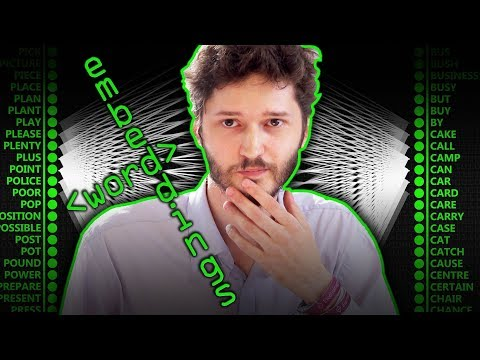

In [ ]:
# If you want to learn more about word2vec, i would suggest watch this YouTube video by Computerphile
YouTubeVideo('gQddtTdmG_8')

In [ ]:
nlp = spacy.load('en_core_web_sm')

So, what do we just do here?

- The `spacy.load` function contains pretty much everything you need for text preprocessing. We are going to debrief more in upcoming cells.

- `en` is the language that will be in your dataset, spaCy supports many other languages.  

In [ ]:
# Getting a sample text from training dataset to demonstrate word2vec  
sample_text = train_dataset.iloc[2]['text'] 
sample_text

"Jazz fan here. I completely feel. Lindsay Mann cousins has more votes than Lindsay Mann, and Lindsay Mann hasn't even stepped on the court this year"

In [ ]:
# Inputting the text in nlp function
doc = nlp(sample_text)

In [ ]:
# Getting the embeddings from the sample text
doc.vector

array([-0.08226894, -0.09054495,  0.0908642 , -0.17296417, -0.02181693,
        0.25872853,  0.20477276,  0.12900694,  0.52532923, -0.08651676,
        0.18839401, -0.13228881, -0.08258452,  0.1598245 , -0.22795603,
       -0.18408598, -0.23409745,  0.1559083 , -0.13128099,  0.0022848 ,
        0.19057919,  0.17733143, -0.3596811 , -0.07240672,  0.06539559,
        0.39955723,  0.26809794, -0.05791382, -0.2338872 , -0.06108345,
        0.30955225,  0.08701764, -0.33390453,  0.06484012, -0.4461343 ,
        0.01780754, -0.11216509,  0.04944769, -0.15644854, -0.25351268,
       -0.1670545 ,  0.07322114,  0.03077644, -0.26146755, -0.27980813,
        0.02508005,  0.35769758, -0.46042717,  0.15149589,  0.06053156,
       -0.04851003, -0.02554531, -0.03027455,  0.46060288,  0.33348703,
        0.05074669, -0.01760495,  0.05256707,  0.12440058, -0.2241067 ,
       -0.17320605,  0.05974302, -0.02921358,  0.04475311, -0.3797868 ,
       -0.18614666,  0.20413119,  0.11336484, -0.10595088,  0.11413835,
        0.38477716,  0.05570101, -0.53268915, -0.01321573,  0.08478589,
        0.4015136 ,  0.00912694, -0.06675377,  0.04506125,  0.16295402,
       -0.15660533, -0.3322739 ,  0.02059322,  0.15009968, -0.01760034,
       -0.01931252,  0.22707002, -0.03025813, -0.04400648, -0.25734535,
       -0.34254253,  0.18064675,  0.08672976,  0.13398089,  0.07303756,
       -0.02080743], dtype=float32)

## Creating our Dataset

In this section, we are going to make a function that will convert the dataset into the right format that we can directly put into the Machine Learning model.

In [ ]:
def create_data(dataset, is_train=True):

  # If we are using a training dataset
  if is_train == True:

    # Getting all text into a python list
    texts = list(dataset['text'].values)
                 
    # Put the list into the nlp pipeline and converting the output into a list
    preprocessed_texts = list(nlp.pipe(texts))

    # Getting vectors for all texts 
    X = [string.vector  for string in preprocessed_texts]

    # Labels for the corrosponding texts 
    y = dataset['label'].tolist()

    return X, y

  else:

    # Getting all text into a python list
    texts = list(dataset['text'].values)
                 
    # Put the list into the nlp pipeline and converting the output into a list
    preprocessed_texts = list(nlp.pipe(texts))

    # Getting vectors for all texts 
    X = [string.vector  for string in preprocessed_texts]

    return X

In [ ]:
# Creating the training dataset
X_train, y_train = create_data(train_dataset)

# Creating the validation dataset
X_val, y_val = create_data(validation_dataset)

X_train[0], y_train[0]

(
    array([ 0.10338211, -0.34270203,  0.32071617,  0.11664824, -0.16524842,
        0.14817472,  0.17077865,  0.08093812,  0.12565881,  0.29482585,
        0.3420241 , -0.36868465,  0.18088023,  0.21407731, -0.06680715,
       -0.25265443, -0.194063  , -0.02595167, -0.5750889 , -0.6906785 ,
        0.63884056,  0.26980814, -0.58178407,  0.26387691,  0.08856302,
       -0.2255681 ,  0.02818402,  0.61174935, -0.03962867,  0.04063671,
       -0.29938278,  0.16833505, -0.08032163,  0.12921129, -0.5919336 ,
        0.37509695,  0.04009431,  0.15826365, -0.02077724, -0.10790493,
       -0.19158477, -0.09723522, -0.2921154 , -0.26856744,  0.09321232,
        0.01727293,  0.2651731 , -0.42502087, -0.10927068, -0.19403839,
       -0.15326658,  0.15373825, -0.4165967 ,  0.54478693,  0.0820941 ,
       -0.5555266 , -0.068533  ,  0.00391094, -0.09510285,  0.11824944,
       -0.21801026, -0.49550158, -0.1219085 , -0.05155931, -0.15937568,
       -0.07889793,  0.0841376 ,  0.3048894 , -0.17306569, -0.31049377,
        0.57634026, -0.30957776,  0.26217738,  0.10937157, -0.7456586 ,
        0.22221708,  0.36382496,  0.26021716,  0.05576628,  0.48059097,
       -0.38341528, -0.28956974,  0.5945319 , -0.1684466 ,  0.10194472,
        0.1898478 ,  0.4104216 ,  0.09569514,  0.36914968, -0.03636365,
       -0.29438084, -0.3162424 ,  0.48143944, -0.26508054,  0.4013783 ,
       -0.11851528], dtype=float32),
    0
)

## Creating the Model

Now we are getting close. Here we are using [sklearn](https://scikit-learn.org/stable/) ( A popular Machine Learning Library ) Decision Tree Classifier model to classify our text ( vectors ) into 2 labels.  

In [ ]:
clf = tree.DecisionTreeClassifier()

## Training

And there we go! It's finally the time to start the training!

In [ ]:
clf = clf.fit(X_train, y_train)

## Validation

Now we have trained the model, let's see the results for the unseen validation dataset. 

In [ ]:
y_pred = clf.predict(X_val)

In [ ]:
# Getting F1 & Accuracy score of validation predictions
f1 = f1_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)

print(f"Validation F1 Score  : {f1} and Accuracy Score {accuracy}")

Validation F1 Score  : 0.2423076923076923 and Accuracy Score 0.6595622119815668


# Submitting Results 📄

Okay, this is the last section 😌 let's get  testing results from the model real quick and submit our prediction directly using AIcrowd CLI.

In [ ]:
# By settings is_train=False, the create_data function will only output the features as setuped in the function
test_data = create_data(test_dataset, is_train=False)

test_predictions = clf.predict(test_data)

In [ ]:
# Applying the predictions to the labels column of the sample submission 
test_dataset['label'] = test_predictions
test_dataset

,text,label
0,I was already over the edge with Cassie Zamora...,0
1,I think you're right. She has oodles of cash a...,0
2,Haha I love this. I used to give mine phone bo...,0
3,Probably out of desperation as they going no a...,1
4,Sorry !! You’re real good at that!!,0
...,...,...
8677,Yeah no...I would find it very demeaning,1
8678,This is how mafia works,1
8679,Ah thanks 👍🏻,0
8680,I ask them straight why they don't respect my ...,0



**Note : Please make sure that there should be filename `submission.csv` in `assets` folder before submitting it**

In [ ]:

!mkdir assets

# Saving the sample submission in assets directory
test_dataset.to_csv(os.path.join("assets", "submission.csv"), index=False)

mkdir: cannot create directory ‘assets’: File exists


## Uploading the Results 
**Note : Please save the notebook before submitting it (Ctrl + S)**

In [ ]:
%aicrowd notebook submit -c emotion-detection -a assets --no-verify

Using notebook: [Starter Kit] Emotion Detection for submission...
Scrubbing API keys from the notebook...


Output()

╭─────────────────────────╮                                        
                                        │ Successfully submitted! │                                        
                                        ╰─────────────────────────╯

                                              Important links                                              
┌──────────────────┬──────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/emotion-detection/submissions/182121              │
│                  │                                                                                      │
│  All submissions │ https://www.aicrowd.com/challenges/emotion-detection/submissions?my_submissions=true │
│                  │                                                                                      │
│      Leaderboard │ https://www.aicrowd.com/challenges/emotion-detection/leaderboards                    │
│                  │                                                                                      │
│ Discussion forum │ https://discourse.aicrowd.com/c/emotion-detection                                    │
│                  │                                                                                      │
│   Challenge page │ https://www.aicrowd.com/challenges/emotion-detection                                 │
└──────────────────┴──────────────────────────────────────────────────────────────────────────────────────┘

Congratulations 🎉 you did it, but they're still a lot of improvements that can be made. Data exploration is one of the most important pipelines in machine learning. Or maybe improving the score, have fun!

And btw -

> Don't be shy to ask a question related to any errors you are getting or doubts in any part of this notebook in the [discussion forum](https://www.aicrowd.com/blitz/puzzles/emotion-detection/discussion) or [AIcrowd Discord server](https://discord.gg/T6uZSWBMSZ), AIcrew will be happy to help you :)

Also, wanna give us your valuable feedback for the next blitz, or wanna work with us on creating blitz challenges? Let us know! 